# **Modelado**


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('data_readyboliviahost.csv')
data = data.drop('client_id', axis=1)
data = data.drop('regdate', axis=1)

X = data.drop('domainstatus', axis=1)
y = data['domainstatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Naive Bayes (GaussianNB) preeliminar\**


Precisión del modelo Naive Bayes: 0.2649

Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.64      0.14      0.23       115
   Cancelled       0.05      0.73      0.09        11
     Pending       0.83      0.22      0.35       112
   Suspended       0.26      0.45      0.33        69
  Terminated       0.51      0.29      0.37        63

    accuracy                           0.26       370
   macro avg       0.46      0.36      0.27       370
weighted avg       0.59      0.26      0.30       370


Matriz de Confusión en texto:
            Active  Cancelled  Pending  Suspended  Terminated
Active          16         36        2         49          12
Cancelled        0          8        1          0           2
Pending          5         61       25         19           2
Suspended        2         35        0         31           1
Terminated       2         19        2         22          18

Área bajo la Curva ROC (AUC-ROC) para c

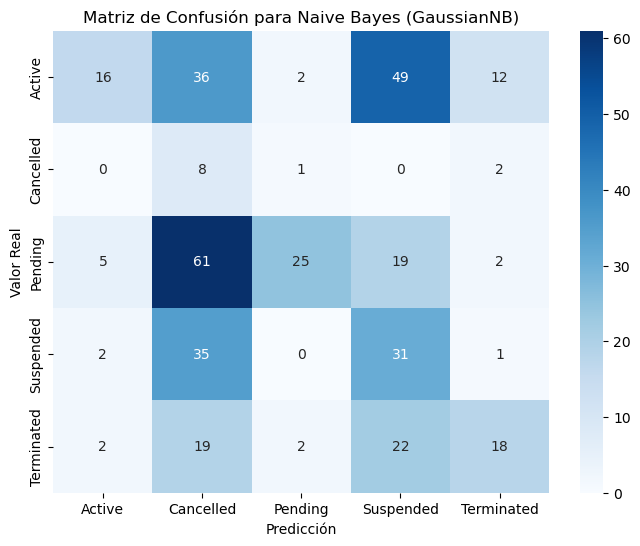

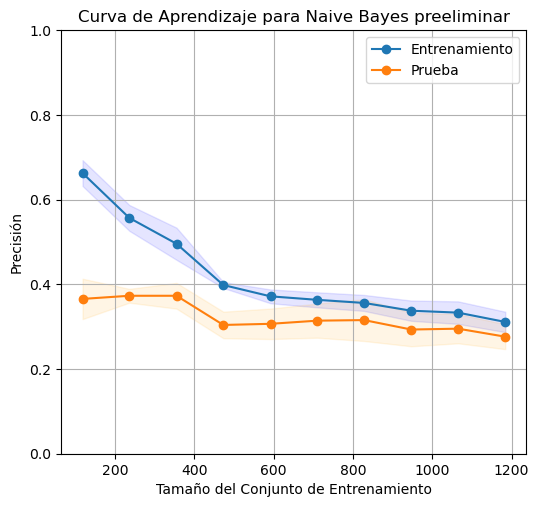

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11800%
Puntuación de Precisión (Entrenamiento): 0.6627
Puntuación de Precisión (Prueba): 0.3655
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 23600%
Puntuación de Precisión (Entrenamiento): 0.5568
Puntuación de Precisión (Prueba): 0.3730
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 35500%
Puntuación de Precisión (Entrenamiento): 0.4958
Puntuación de Precisión (Prueba): 0.3730
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 47300%
Puntuación de Precisión (Entrenamiento): 0.3983
Puntuación de Precisión (Prueba): 0.3041
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 59200%
Puntuación de Precisión (Entrenamiento): 0.3716
Puntuación de Precisión (Prueba): 0.3068
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 71000%
Puntuación de Precisión (Entrenamiento): 0.3634
Puntuación

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos
data = pd.read_csv('data_readyboliviahost.csv')
data = data.drop(['client_id', 'regdate'], axis=1)

X = data.drop('domainstatus', axis=1)
y = data['domainstatus']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Naive Bayes: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=naive_bayes.classes_)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=naive_bayes.classes_),
                             index=naive_bayes.classes_,
                             columns=naive_bayes.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(naive_bayes.classes_)):
    auc_roc_scores[naive_bayes.classes_[i]] = roc_auc_score(y_test == naive_bayes.classes_[i], y_pred == naive_bayes.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión (opcional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Naive Bayes (GaussianNB)')
plt.show()

# Calcular la curva de aprendizaje para Naive Bayes
train_sizes, train_scores, test_scores = learning_curve(
    naive_bayes, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.title('Curva de Aprendizaje para Naive Bayes preeliminar')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylim(0, 1)  # Ajustar el rango del eje
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid()
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

### **Naive Bayes (GaussianNB) ajustado**

Precisión del modelo Naive Bayes después del ajuste y validación cruzada: 0.7216

Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.81      0.92      0.86       115
   Cancelled       0.00      0.00      0.00        11
     Pending       0.72      0.80      0.76       112
   Suspended       0.57      0.52      0.55        69
  Terminated       0.69      0.56      0.61        63

    accuracy                           0.72       370
   macro avg       0.56      0.56      0.56       370
weighted avg       0.69      0.72      0.70       370


Matriz de Confusión en texto:
            Active  Cancelled  Pending  Suspended  Terminated
Active         106          0        4          5           0
Cancelled        1          0        9          1           0
Pending         17          0       90          5           0
Suspended        3          0       14         36          16
Terminated       4          0        8         16          35


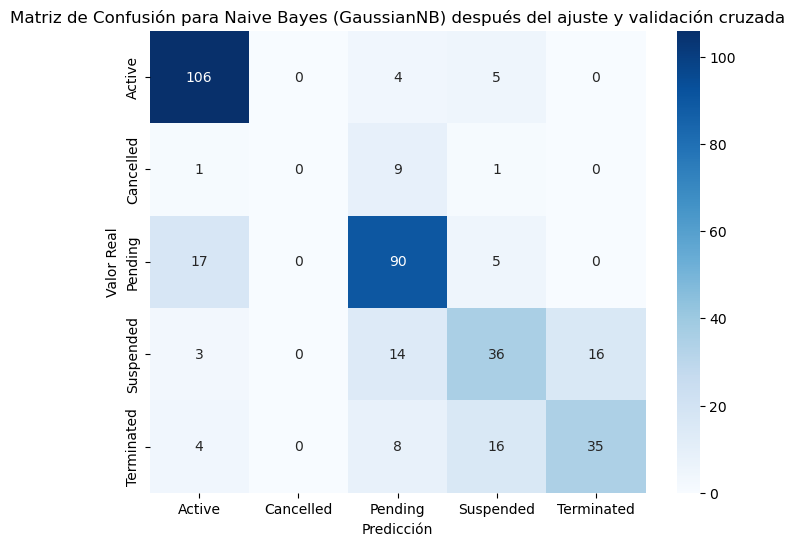

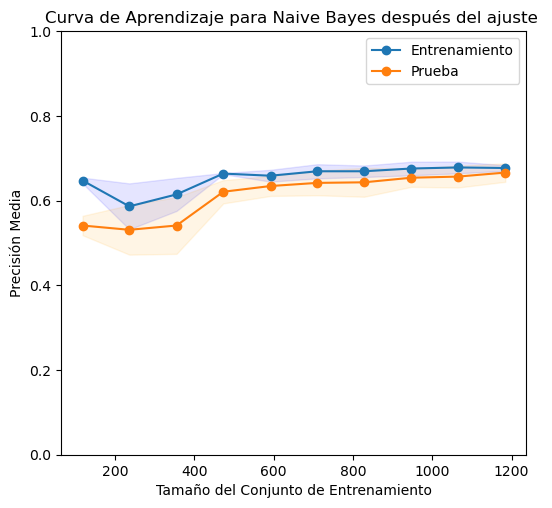

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11800%
Puntuación de Precisión (Entrenamiento): 0.6475
Puntuación de Precisión (Prueba): 0.5412
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 23600%
Puntuación de Precisión (Entrenamiento): 0.5864
Puntuación de Precisión (Prueba): 0.5311
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 35500%
Puntuación de Precisión (Entrenamiento): 0.6146
Puntuación de Precisión (Prueba): 0.5412
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 47300%
Puntuación de Precisión (Entrenamiento): 0.6638
Puntuación de Precisión (Prueba): 0.6209
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 59200%
Puntuación de Precisión (Entrenamiento): 0.6588
Puntuación de Precisión (Prueba): 0.6345
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 71000%
Puntuación de Precisión (Entrenamiento): 0.6693
Puntuación

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('data_readyboliviahost.csv')
data = data.drop(['client_id', 'regdate'], axis=1)
X = data.drop('domainstatus', axis=1)
y = data['domainstatus']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo Naive Bayes
naive_bayes = GaussianNB()

# Definir los hiperparámetros a ajustar
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Configurar la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(naive_bayes, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo después del ajuste
best_naive_bayes = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_naive_bayes.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Naive Bayes después del ajuste y validación cruzada: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=best_naive_bayes.classes_)
print("\nInforme de Clasificación:")
print(report)


# Resto del código para métricas adicionales, informe de clasificación, matriz de confusión, etc.

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=best_naive_bayes.classes_),
                             index=best_naive_bayes.classes_,
                             columns=best_naive_bayes.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)



# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(best_naive_bayes.classes_)):
    auc_roc_scores[best_naive_bayes.classes_[i]] = roc_auc_score(y_test == best_naive_bayes.classes_[i], y_pred == best_naive_bayes.classes_[i])



# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular la curva de aprendizaje para Naive Bayes
train_sizes, train_scores, test_scores = learning_curve(
    best_naive_bayes, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))


# Calcular y graficar la matriz de confusión (opcional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_naive_bayes.classes_, yticklabels=best_naive_bayes.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Naive Bayes (GaussianNB) después del ajuste y validación cruzada')
plt.show()

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje con intervalos de confianza
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Prueba')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión Media')
plt.title('Curva de Aprendizaje para Naive Bayes después del ajuste ')
plt.ylim(0, 1)  # Ajustar el rango del eje y
plt.legend()
plt.show()


# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

# **LogisticRegression**




Precisión del modelo de Regresión Logística: 0.6297

Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.57      0.93      0.71       115
   Cancelled       0.00      0.00      0.00        11
     Pending       0.73      0.85      0.78       112
   Suspended       0.67      0.26      0.38        69
  Terminated       0.54      0.21      0.30        63

    accuracy                           0.63       370
   macro avg       0.50      0.45      0.43       370
weighted avg       0.61      0.63      0.58       370


Matriz de Confusión en texto:
            Active  Cancelled  Pending  Suspended  Terminated
Active         107          0        5          3           0
Cancelled        1          0       10          0           0
Pending         17          0       95          0           0
Suspended       27          0       13         18          11
Terminated      36          0        8          6          13

Área bajo la Curva ROC (AUC-

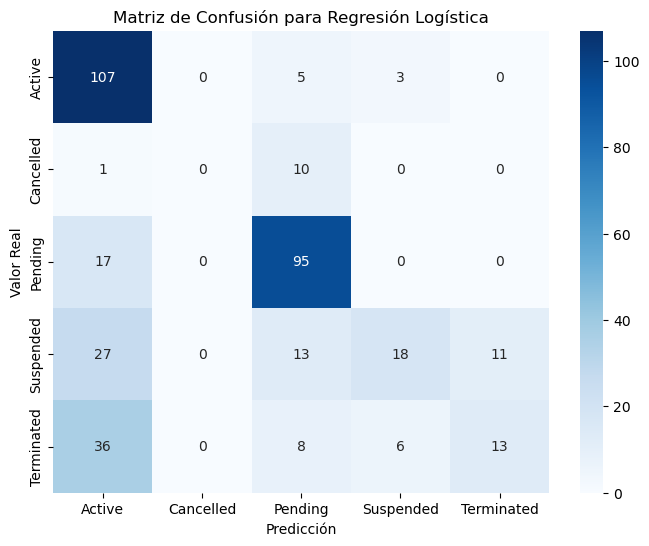

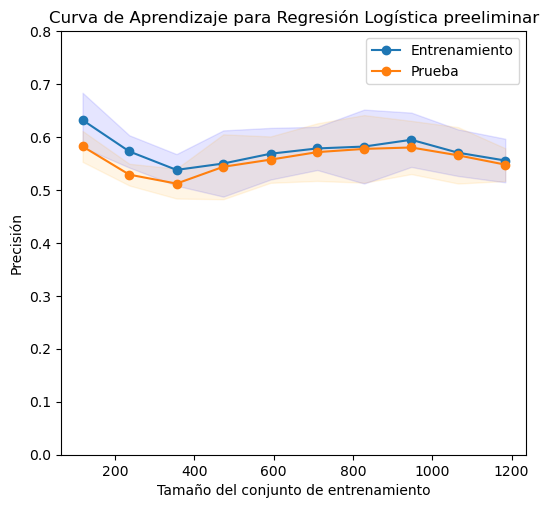

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11800%
Puntuación de Precisión (Entrenamiento): 0.6322
Puntuación de Precisión (Prueba): 0.5824
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 23600%
Puntuación de Precisión (Entrenamiento): 0.5729
Puntuación de Precisión (Prueba): 0.5291
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 35500%
Puntuación de Precisión (Entrenamiento): 0.5380
Puntuación de Precisión (Prueba): 0.5122
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 47300%
Puntuación de Precisión (Entrenamiento): 0.5501
Puntuación de Precisión (Prueba): 0.5439
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 59200%
Puntuación de Precisión (Entrenamiento): 0.5686
Puntuación de Precisión (Prueba): 0.5574
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 71000%
Puntuación de Precisión (Entrenamiento): 0.5786
Puntuación

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Resto de tu código para cargar datos, dividir conjuntos, etc.

# Crear y entrenar el modelo de Regresión Logística
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de Regresión Logística: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=logistic_regression.classes_)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=logistic_regression.classes_),
                             index=logistic_regression.classes_,
                             columns=logistic_regression.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(logistic_regression.classes_)):
    auc_roc_scores[logistic_regression.classes_[i]] = roc_auc_score(y_test == logistic_regression.classes_[i], y_pred == logistic_regression.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión (opcional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_regression.classes_, yticklabels=logistic_regression.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Regresión Logística')
plt.show()

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    logistic_regression, X_train, y_train, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje para Regresión Logística preeliminar')
plt.ylim(0, 0.8)  # Ajustar el rango del eje
plt.legend()
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)


### **LogisticRegression ajustado**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Precisión del modelo de Regresión Logística después del ajuste y validación cruzada: 0.6108

Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.55      0.92      0.69       115
   Cancelled       0.00      0.00      0.00        11
     Pending       0.75      0.85      0.80       112
   Suspended       0.50      0.19      0.27        69
  Terminated       0.44      0.19      0.27        63

    accuracy                           0.61       370
   macro avg       0.45      0.43      0.41       370
weighted avg       0.57      0.61      0.55       370


Matriz de Confusión en texto:
            Active  Cancelled  Pending  Suspended  Terminated
Active         106          0        5          2           2
Cancelled        2          0        9          0           0
Pending         17          0       95          0           0
Suspended       32          0       11         13          13
Terminated      34          0        6         11  

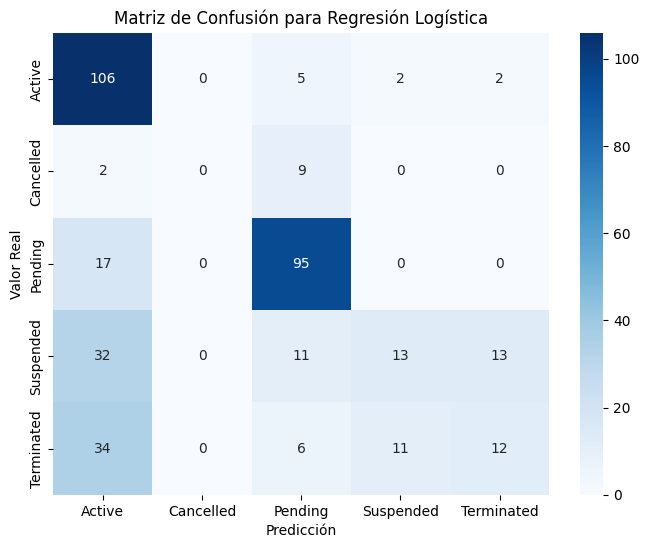

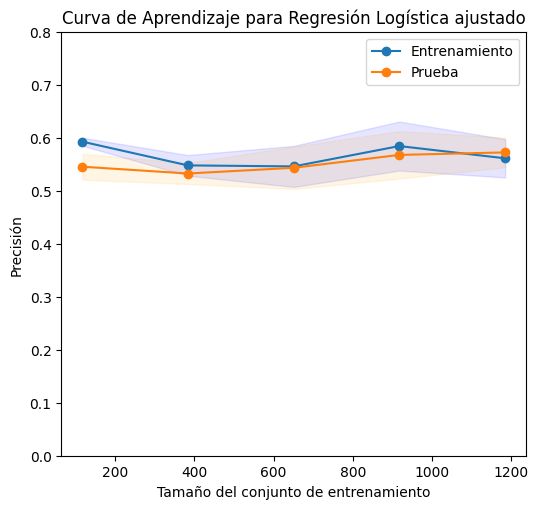

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11800%
Puntuación de Precisión (Entrenamiento): 0.5932
Puntuación de Precisión (Prueba): 0.5459
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 38400%
Puntuación de Precisión (Entrenamiento): 0.5484
Puntuación de Precisión (Prueba): 0.5331
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 65100%
Puntuación de Precisión (Entrenamiento): 0.5465
Puntuación de Precisión (Prueba): 0.5439
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 91700%
Puntuación de Precisión (Entrenamiento): 0.5850
Puntuación de Precisión (Prueba): 0.5682
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 118400%
Puntuación de Precisión (Entrenamiento): 0.5618
Puntuación de Precisión (Prueba): 0.5730
----------------------------------------


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('data_readyboliviahost.csv')
data = data.drop(['client_id', 'regdate'], axis=1)
X = data.drop('domainstatus', axis=1)
y = data['domainstatus']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de Regresión Logística
logistic_regression = LogisticRegression()

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

# Configurar la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(logistic_regression, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo después del ajuste
best_logistic_regression = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_logistic_regression.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de Regresión Logística después del ajuste y validación cruzada: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=best_logistic_regression.classes_)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=best_logistic_regression.classes_),
                             index=best_logistic_regression.classes_,
                             columns=best_logistic_regression.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(best_logistic_regression.classes_)):
    auc_roc_scores[best_logistic_regression.classes_[i]] = roc_auc_score(y_test == best_logistic_regression.classes_[i], y_pred == best_logistic_regression.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión (opcional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_logistic_regression.classes_, yticklabels=best_logistic_regression.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Regresión Logística')
plt.show()

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_logistic_regression, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-',  label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-',  label="Prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.ylim(0, 0.8)  # Ajustar el rango del eje y
plt.title("Curva de Aprendizaje para Regresión Logística ajustado")
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

# **DecisionTreeClassifier**



Precisión del modelo DecisionTreeClassifier: 0.9459

Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.97      0.99      0.98       115
   Cancelled       0.90      0.82      0.86        11
     Pending       0.96      0.98      0.97       112
   Suspended       0.95      0.87      0.91        69
  Terminated       0.89      0.90      0.90        63

    accuracy                           0.95       370
   macro avg       0.93      0.91      0.92       370
weighted avg       0.95      0.95      0.95       370


Matriz de Confusión en texto:
            Active  Cancelled  Pending  Suspended  Terminated
Active         114          0        1          0           0
Cancelled        1          9        1          0           0
Pending          2          0      110          0           0
Suspended        0          1        1         60           7
Terminated       1          0        2          3          57

Área bajo la Curva ROC (AUC-

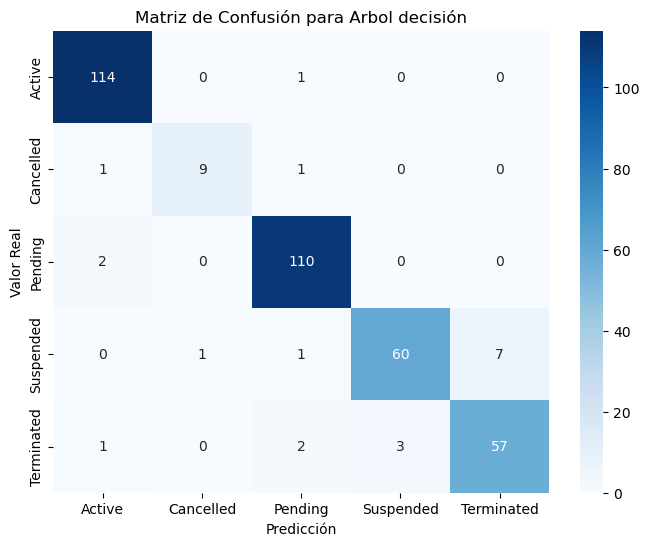

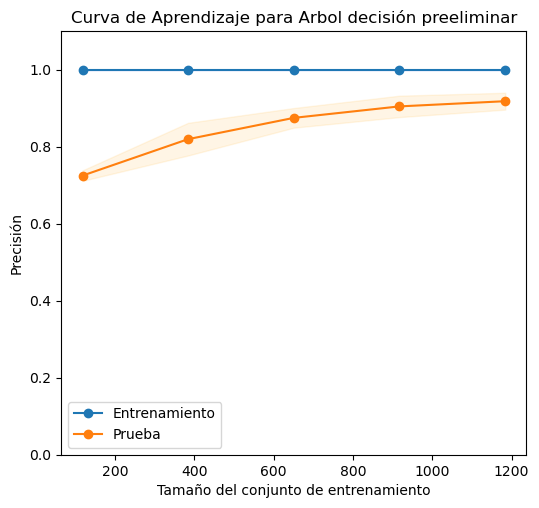

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11800%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7250
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 38400%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.8196
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 65100%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.8750
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 91700%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.9047
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 118400%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.9182
----------------------------------------


In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data_readyboliviahost.csv')
data = data.drop('client_id', axis=1)
data = data.drop('regdate', axis=1)

X = data.drop('domainstatus', axis=1)
y = data['domainstatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo DecisionTreeClassifier: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=decision_tree.classes_)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=decision_tree.classes_),
                             index=decision_tree.classes_,
                             columns=decision_tree.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(decision_tree.classes_)):
    auc_roc_scores[decision_tree.classes_[i]] = roc_auc_score(y_test == decision_tree.classes_[i], y_pred == decision_tree.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Mostrar la matriz de confusión como un gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Arbol decisión')

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(decision_tree, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6,5.5))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.ylim(0, 1.1)  # Ajustar el rango del eje y
plt.title("Curva de Aprendizaje para Arbol decisión preeliminar")
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

## **DecisionTreeClassifier ajustado**

In [ ]:
!pip install scikit-optimize


Precisión del modelo Arbol decisión después del ajuste: 0.9000

Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.97      0.98      0.97       115
   Cancelled       0.73      0.73      0.73        11
     Pending       0.96      0.95      0.95       112
   Suspended       0.79      0.87      0.83        69
  Terminated       0.82      0.73      0.77        63

    accuracy                           0.90       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.90      0.90      0.90       370


Matriz de Confusión en texto:
            Active  Cancelled  Pending  Suspended  Terminated
Active         113          0        0          2           0
Cancelled        1          8        2          0           0
Pending          2          1      106          0           3
Suspended        0          1        1         60           7
Terminated       1          1        1         14          46

Área bajo la Curv

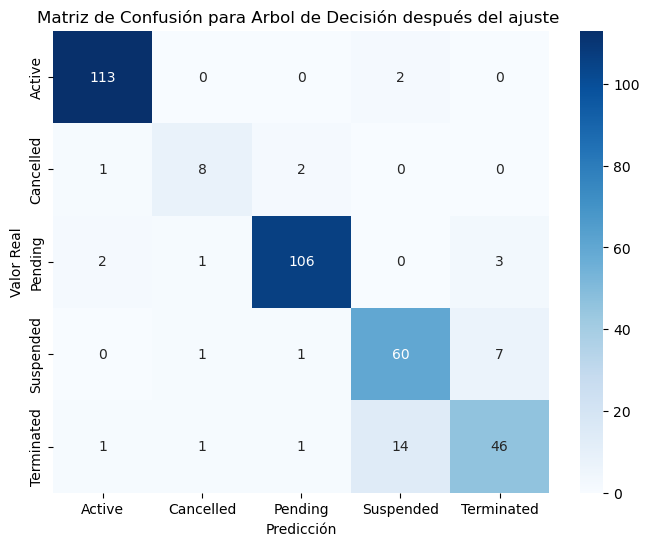

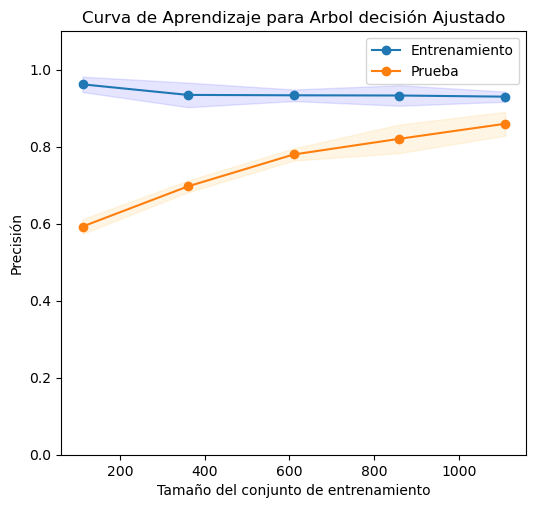

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11100%
Puntuación de Precisión (Entrenamiento): 0.9620
Puntuación de Precisión (Prueba): 0.5927
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 36000%
Puntuación de Precisión (Entrenamiento): 0.9346
Puntuación de Precisión (Prueba): 0.6970
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 61000%
Puntuación de Precisión (Entrenamiento): 0.9336
Puntuación de Precisión (Prueba): 0.7799
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 86000%
Puntuación de Precisión (Entrenamiento): 0.9330
Puntuación de Precisión (Prueba): 0.8206
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 111000%
Puntuación de Precisión (Entrenamiento): 0.9300
Puntuación de Precisión (Prueba): 0.8597
----------------------------------------


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV


# Cargar los datos
data = pd.read_csv('data_readyboliviahost.csv')
data = data.drop(['client_id', 'regdate'], axis=1)
X = data.drop('domainstatus', axis=1)
y = data['domainstatus']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo DecisionTreeClassifier con parámetros iniciales más conservadores
decision_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=6,  # Reducir la profundidad máxima
    min_samples_split=5,  # Mantener el mínimo de muestras para dividir un nodo
    min_samples_leaf=2,  # Mantener el mínimo de muestras en una hoja
    min_impurity_decrease=0.005  # Agregar regularización por disminución mínima de impureza
)
# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11)),
    'min_impurity_decrease': [0.0] + [i/1000.0 for i in range(1, 11)]
}

# Configurar la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=43)

# Realizar la búsqueda de hiperparámetros con búsqueda aleatoria
random_search = RandomizedSearchCV(decision_tree, param_distributions=param_dist, scoring='precision_macro', cv=cv, n_iter=20, random_state=42)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo después del ajuste
best_decision_tree = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_decision_tree.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Arbol decisión después del ajuste: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=best_decision_tree.classes_)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=best_decision_tree.classes_),
                             index=best_decision_tree.classes_,
                             columns=best_decision_tree.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(best_decision_tree.classes_)):
    auc_roc_scores[best_decision_tree.classes_[i]] = roc_auc_score(y_test == best_decision_tree.classes_[i], y_pred == best_decision_tree.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Mostrar la matriz de confusión como un gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", xticklabels=best_decision_tree.classes_, yticklabels=best_decision_tree.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Arbol de Decisión después del ajuste ')

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_decision_tree, X_train, y_train, cv=cv, scoring='precision_macro', n_jobs=-1)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-',  label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-',  label="Prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.ylim(0, 1.1)  # Ajustar el rango del eje y
plt.title("Curva de Aprendizaje para Arbol decisión Ajustado")
plt.show()


# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)


# **RandomForestClassifier**

Precisión del modelo Bosque aleatorio: 0.9243

Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.94      0.95      0.94       115
   Cancelled       1.00      0.73      0.84        11
     Pending       0.95      0.97      0.96       112
   Suspended       0.90      0.91      0.91        69
  Terminated       0.87      0.84      0.85        63

    accuracy                           0.92       370
   macro avg       0.93      0.88      0.90       370
weighted avg       0.92      0.92      0.92       370


Matriz de Confusión en texto:
            Active  Cancelled  Pending  Suspended  Terminated
Active         109          0        2          3           1
Cancelled        1          8        2          0           0
Pending          1          0      109          0           2
Suspended        1          0        0         63           5
Terminated       4          0        2          4          53

Área bajo la Curva ROC (AUC-ROC) p

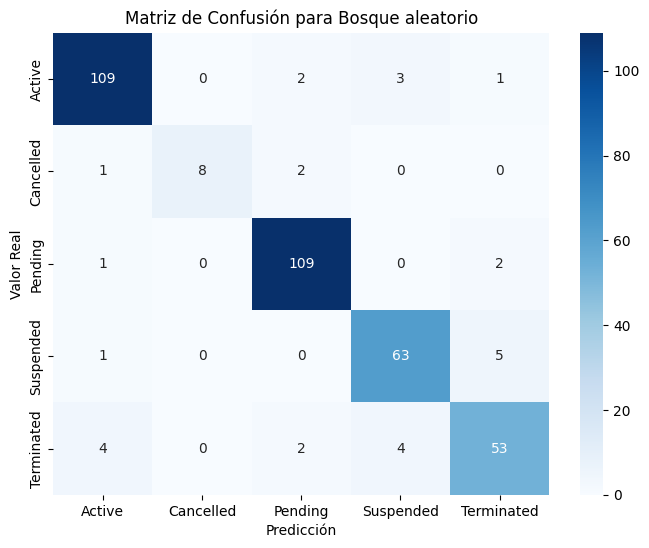

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


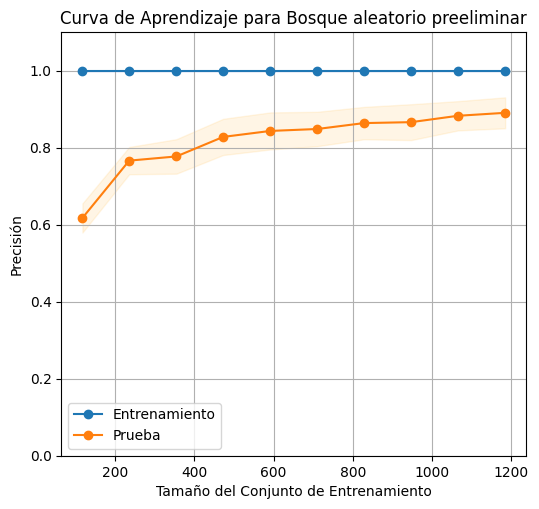

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11800%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.6175
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 23600%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7665
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 35500%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7774
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 47300%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.8281
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 59200%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.8436
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 71000%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import learning_curve
import numpy as np

data = pd.read_csv('data_readyboliviahost.csv')
data = data.drop('client_id', axis=1)
data = data.drop('regdate', axis=1)
X = data.drop('domainstatus', axis=1)
y = data['domainstatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear y entrenar el modelo RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo RandomForestClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Bosque aleatorio: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=random_forest.classes_)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=random_forest.classes_),
                             index=random_forest.classes_,
                             columns=random_forest.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {class_label: roc_auc_score(y_test == class_label, y_pred == class_label)
                  for class_label in random_forest.classes_}

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Bosque aleatorio')
plt.show()

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    random_forest, X_train, y_train, cv=5, scoring='precision_macro', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.title('Curva de Aprendizaje para Bosque aleatorio preeliminar')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.ylim(0, 1.1)  # Ajustar el rango del eje y
plt.grid()
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

Precisión del modelo Bosque aleatorio después del ajuste: 0.9216

Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.97      0.98      0.97       115
   Cancelled       1.00      0.73      0.84        11
     Pending       0.95      0.96      0.96       112
   Suspended       0.88      0.84      0.86        69
  Terminated       0.83      0.86      0.84        63

    accuracy                           0.92       370
   macro avg       0.92      0.87      0.90       370
weighted avg       0.92      0.92      0.92       370


Matriz de Confusión en texto:
            Active  Cancelled  Pending  Suspended  Terminated
Active         113          0        0          2           0
Cancelled        1          8        2          0           0
Pending          2          0      108          1           1
Suspended        0          0        1         58          10
Terminated       1          0        3          5          54

Área bajo la Cu

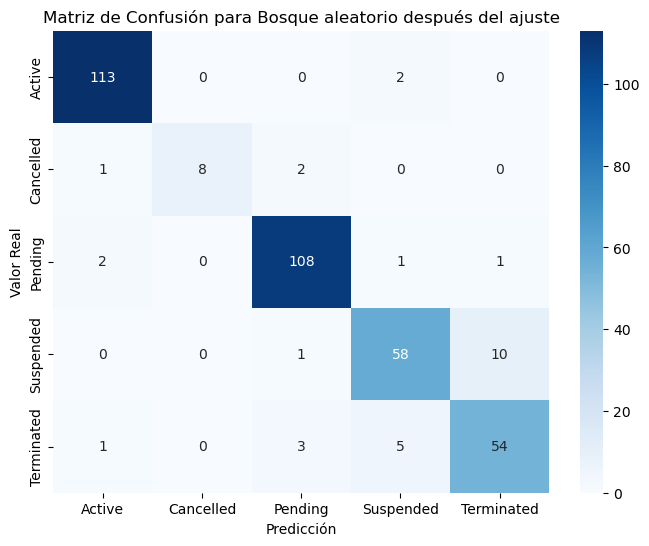

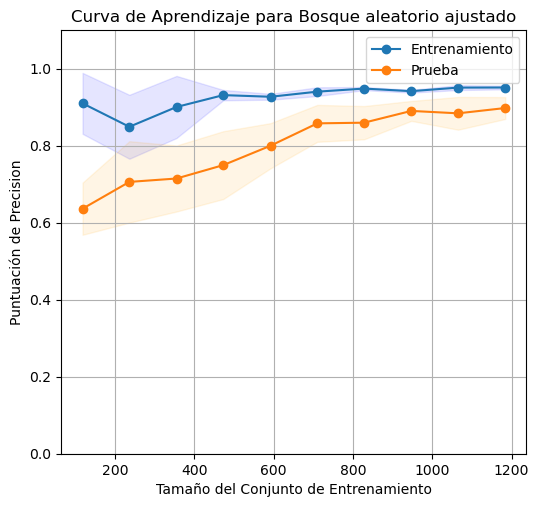

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11800%
Puntuación de Precisión (Entrenamiento): 0.9101
Puntuación de Precisión (Prueba): 0.6363
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 23600%
Puntuación de Precisión (Entrenamiento): 0.8492
Puntuación de Precisión (Prueba): 0.7060
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 35500%
Puntuación de Precisión (Entrenamiento): 0.9006
Puntuación de Precisión (Prueba): 0.7148
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 47300%
Puntuación de Precisión (Entrenamiento): 0.9314
Puntuación de Precisión (Prueba): 0.7496
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 59200%
Puntuación de Precisión (Entrenamiento): 0.9272
Puntuación de Precisión (Prueba): 0.7999
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 71000%
Puntuación de Precisión (Entrenamiento): 0.9404
Puntuación

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

# Cargar los datos
data = pd.read_csv('data_readyboliviahost.csv')
data = data.drop(['client_id', 'regdate'], axis=1)
X = data.drop('domainstatus', axis=1)
y = data['domainstatus']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo RandomForestClassifier con hiperparámetros ajustados
random_forest = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Realizar la búsqueda de hiperparámetros con validación cruzada
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=cv, random_state=42)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo después del ajuste
best_random_forest = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_random_forest.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Bosque aleatorio después del ajuste: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=best_random_forest.classes_)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=best_random_forest.classes_),
                             index=best_random_forest.classes_,
                             columns=best_random_forest.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for class_label in best_random_forest.classes_:
    auc_roc_scores[class_label] = roc_auc_score(y_test == class_label, y_pred == class_label)

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", xticklabels=best_random_forest.classes_, yticklabels=best_random_forest.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Bosque aleatorio después del ajuste')
plt.show()

# Configurar la validación cruzada con StratifiedKFold para problemas de clasificación multiclase
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir tamaños de conjunto de entrenamiento para los cuales se calculará la curva de aprendizaje
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_random_forest, X_train, y_train, cv=cv, scoring='precision_macro', train_sizes=train_sizes)

# Calcular las medias y desviaciones estándar de las puntuaciones
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje con estilos específicos
plt.figure(figsize=(6, 5.5))

# Curva de entrenamiento
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')

# Curva de prueba
plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.title('Curva de Aprendizaje para Bosque aleatorio ajustado')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación de Precision')
plt.ylim(0, 1.1)  # Ajustar el rango del eje y
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

# **KNeighborsClassifier**

Precisión del modelo KNeighbors Classifier: 0.8243
Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.87      0.90      0.89       115
   Cancelled       0.62      0.73      0.67        11
     Pending       0.88      0.79      0.84       112
   Suspended       0.74      0.83      0.78        69
  Terminated       0.80      0.75      0.77        63

    accuracy                           0.82       370
   macro avg       0.78      0.80      0.79       370
weighted avg       0.83      0.82      0.82       370


Matriz de Confusión para KNeighbors Classifier:

            Active  Cancelled  Pending  Suspended  Terminated
Active         104          1        2          5           3
Cancelled        1          8        1          1           0
Pending         10          2       89          7           4
Suspended        2          1        4         57           5
Terminated       3          1        5          7          47

Área bajo l

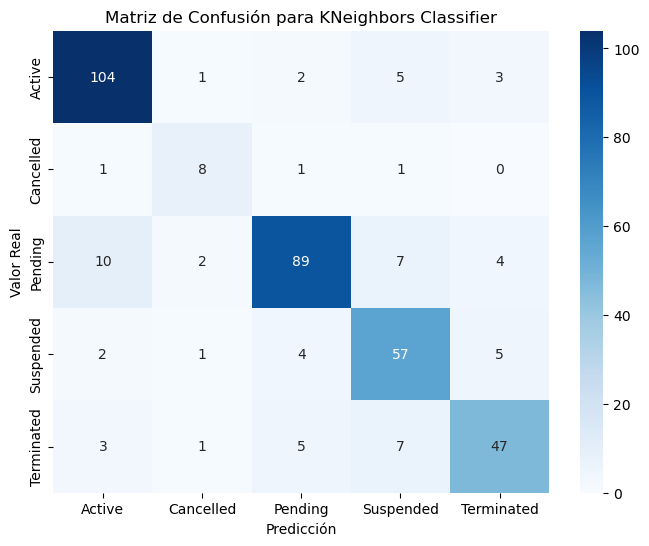

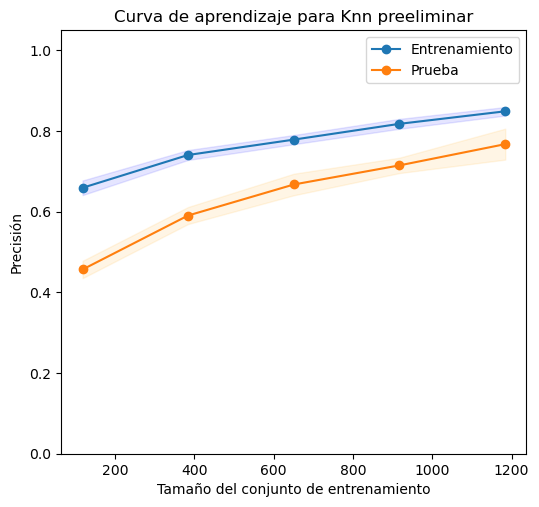

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11800%
Puntuación de Precisión (Entrenamiento): 0.6593
Puntuación de Precisión (Prueba): 0.4568
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 38400%
Puntuación de Precisión (Entrenamiento): 0.7406
Puntuación de Precisión (Prueba): 0.5905
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 65100%
Puntuación de Precisión (Entrenamiento): 0.7788
Puntuación de Precisión (Prueba): 0.6676
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 91700%
Puntuación de Precisión (Entrenamiento): 0.8179
Puntuación de Precisión (Prueba): 0.7149
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 118400%
Puntuación de Precisión (Entrenamiento): 0.8490
Puntuación de Precisión (Prueba): 0.7676
----------------------------------------


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve, StratifiedKFold

# Crear y entrenar el modelo KNeighborsClassifier
kneighbors_classifier = KNeighborsClassifier()
kneighbors_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = kneighbors_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNeighbors Classifier: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=kneighbors_classifier.classes_)
print("Informe de Clasificación:")
print(report)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una tabla de Pandas a partir de la matriz de confusión
confusion_df = pd.DataFrame(cm, index=kneighbors_classifier.classes_, columns=kneighbors_classifier.classes_)
print("\nMatriz de Confusión para KNeighbors Classifier:\n")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(kneighbors_classifier.classes_)):
    auc_roc_scores[kneighbors_classifier.classes_[i]] = roc_auc_score(y_test == kneighbors_classifier.classes_[i], y_pred == kneighbors_classifier.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# También se muestra la matriz de confusión como una gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=kneighbors_classifier.classes_, yticklabels=kneighbors_classifier.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para KNeighbors Classifier')
plt.show()

# Configurar la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(kneighbors_classifier, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-',  label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-',  label="Prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.ylim(0, 1.05)  # Ajustar el rango del eje y
plt.title("Curva de aprendizaje para Knn preeliminar")
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)



Precisión (Accuracy) del modelo Knn después del ajuste: 0.9081
Informe de Clasificación:
              precision    recall  f1-score   support

      Active       0.92      0.96      0.94       115
   Cancelled       0.80      0.73      0.76        11
     Pending       0.95      0.90      0.93       112
   Suspended       0.83      0.93      0.88        69
  Terminated       0.91      0.84      0.88        63

    accuracy                           0.91       370
   macro avg       0.88      0.87      0.88       370
weighted avg       0.91      0.91      0.91       370


Matriz de Confusión en texto:
            Active  Cancelled  Pending  Suspended  Terminated
Active         110          1        0          4           0
Cancelled        1          8        2          0           0
Pending          6          1      101          3           1
Suspended        1          0        0         64           4
Terminated       1          0        3          6          53

Área bajo la Curv

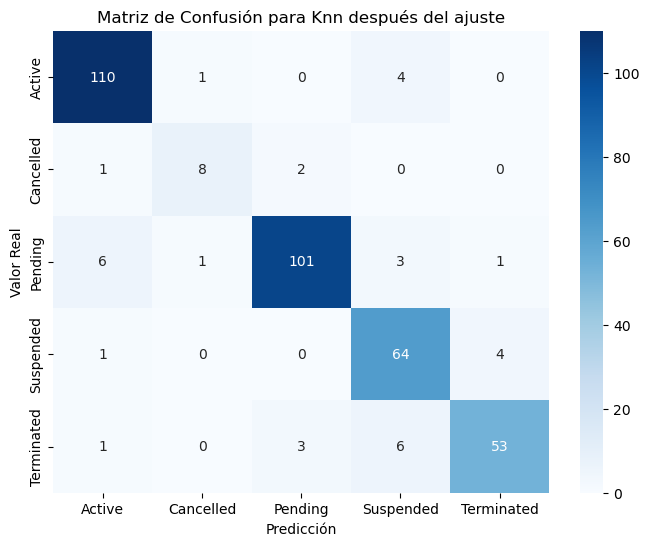

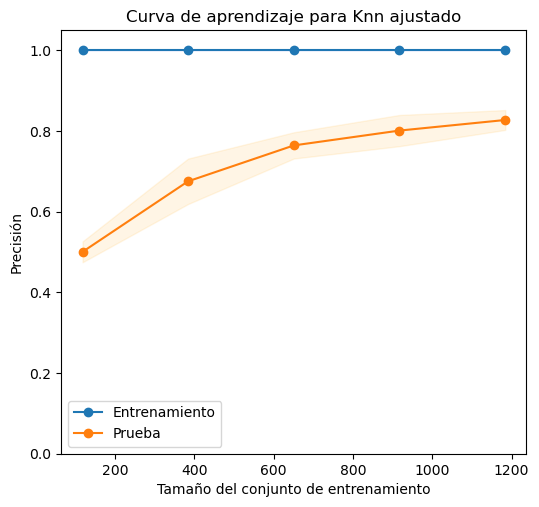

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 11800%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.5005
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 38400%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.6754
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 65100%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7644
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 91700%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.8012
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 118400%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.8274
----------------------------------------


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('data_readyboliviahost.csv')
data = data.drop(['client_id', 'regdate'], axis=1)
X = data.drop('domainstatus', axis=1)
y = data['domainstatus']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNeighborsClassifier
kneighbors_classifier = KNeighborsClassifier()

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Configurar la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(kneighbors_classifier, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo después del ajuste
best_kneighbors_classifier = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_kneighbors_classifier.predict(X_test)

# Calcular y mostrar la métrica accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión (Accuracy) del modelo Knn después del ajuste: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=best_kneighbors_classifier.classes_)
print("Informe de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
cm = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(cm, index=best_kneighbors_classifier.classes_, columns=best_kneighbors_classifier.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(best_kneighbors_classifier.classes_)):
    auc_roc_scores[best_kneighbors_classifier.classes_[i]] = roc_auc_score(y_test == best_kneighbors_classifier.classes_[i], y_pred == best_kneighbors_classifier.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_kneighbors_classifier.classes_, yticklabels=best_kneighbors_classifier.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Knn después del ajuste')
plt.show()

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_kneighbors_classifier, X_train, y_train, cv=cv, scoring='f1_macro', n_jobs=-1)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-',  label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-',  label="Prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.ylim(0, 1.05)  # Ajustar el rango del eje y
plt.title("Curva de aprendizaje para Knn ajustado")
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

